In [13]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List
import random

In [14]:
class AgentState(TypedDict):
    name: str
    guesses: List[int]
    attempts: int
    lower: int
    upper: int
    target: int

In [15]:
def setup_node(state: AgentState) -> AgentState:
    """node to setup the game"""

    state['name'] = f'hi {state["name"]} welcome to the game'
    state['guesses'] = []
    state['attempts'] = 0
    state['target'] = random.randint(state['lower'], state['upper'])

    return state

def guess_node(state: AgentState) -> AgentState:
    """node to guess the number"""

    state['guesses'].append(random.randint(state['lower'], state['upper']))
    state['attempts'] += 1

    return state

def hint_node(state: AgentState) -> AgentState:
    """node to get a hint"""
    
    if state['guesses'][-1] < state['target']:
        state['lower'] = state['guesses'][-1] + 1
    else: 
        state['upper'] = state['guesses'][-1] - 1

    return state

def is_correct(state: AgentState) -> AgentState:
    """check if the guess is correct"""

    guess = state['guesses'][-1]
    if guess == state['target'] or state['attempts'] == 7:
        return "exit"
    return "next_guess"

In [16]:
graph = StateGraph(AgentState)

graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_node("hint", hint_node)

graph.add_edge(START, "setup")
graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint")

graph.add_conditional_edges(
    "hint",
    is_correct,
    {
        "next_guess":"guess",
        "exit":END
    }
)

app = graph.compile()


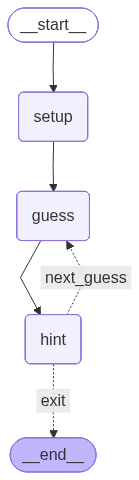

In [17]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
app.invoke({"name":"saajan", "lower":1, "upper":20})

{'name': 'hi saajan welcome to the game',
 'guesses': [6, 11],
 'attempts': 2,
 'lower': 7,
 'upper': 10,
 'target': 11}